In [1]:
!nvidia-smi

Wed Mar  9 12:00:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 462.30       Driver Version: 462.30       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce MX130      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P8    N/A /  N/A |    146MiB /  2048MiB |     16%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pandas_datareader as data

In [4]:
df=pd.read_csv("C:/Users/NAViN/zmarket/SBIN.NS.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-02,395.000000,399.549988,390.549988,394.200012,390.593842,30534337
1,2021-03-03,396.500000,408.899994,396.000000,405.049988,401.344574,46268223
2,2021-03-04,398.700012,403.500000,394.450012,395.649994,392.030579,43603653
3,2021-03-05,395.000000,395.000000,378.100006,383.649994,380.140350,72179228
4,2021-03-08,388.450012,393.399994,386.049988,389.600006,386.035919,39147858


In [5]:
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
247,2022-03-02,478.0,479.799988,467.0,474.25,474.25,21977805


<AxesSubplot:>

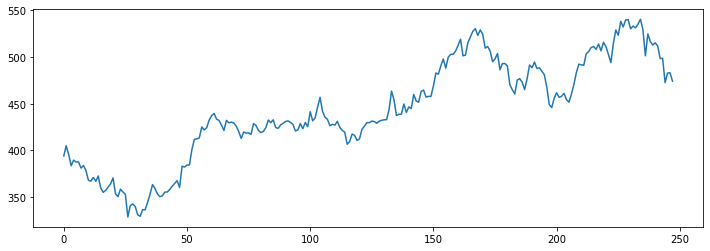

In [6]:
df['Close'].plot(figsize=(12,4))

In [7]:
df =df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,395.000000,399.549988,390.549988,394.200012,30534337
1,396.500000,408.899994,396.000000,405.049988,46268223
2,398.700012,403.500000,394.450012,395.649994,43603653
3,395.000000,395.000000,378.100006,383.649994,72179228
4,388.450012,393.399994,386.049988,389.600006,39147858


<AxesSubplot:>

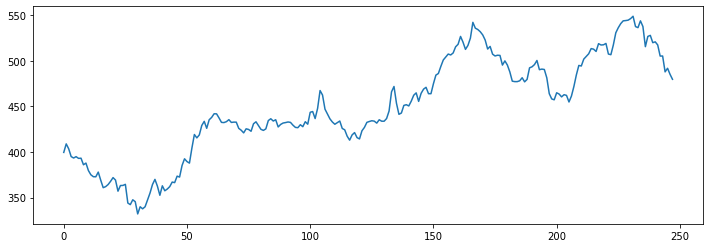

In [8]:
#plt.plot(df.Close)
#ploting the max high at the time series data
df['High'].plot(figsize=(12,4))

In [9]:
df

,Open,High,Low,Close,Volume
0,395.000000,399.549988,390.549988,394.200012,30534337
1,396.500000,408.899994,396.000000,405.049988,46268223
2,398.700012,403.500000,394.450012,395.649994,43603653
3,395.000000,395.000000,378.100006,383.649994,72179228
4,388.450012,393.399994,386.049988,389.600006,39147858
...,...,...,...,...,...
243,503.000000,505.350006,497.250000,498.700012,13899433
244,480.000000,487.950012,468.000000,472.649994,32356037
245,480.000000,491.899994,479.299988,482.950012,21792287
246,476.899994,485.299988,473.100006,483.200012,18069367


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    495.8700
244    496.0800
245    496.2780
246    496.4630
247    496.6335
Name: Close, Length: 248, dtype: float64

In [11]:
ma300 = df.Close.rolling(200).mean()
ma300

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
243    460.27025
244    460.82500
245    461.41650
246    461.99400
247    462.56300
Name: Close, Length: 248, dtype: float64

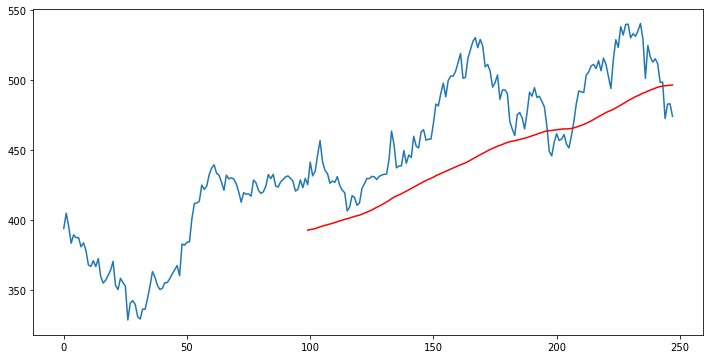

In [11]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

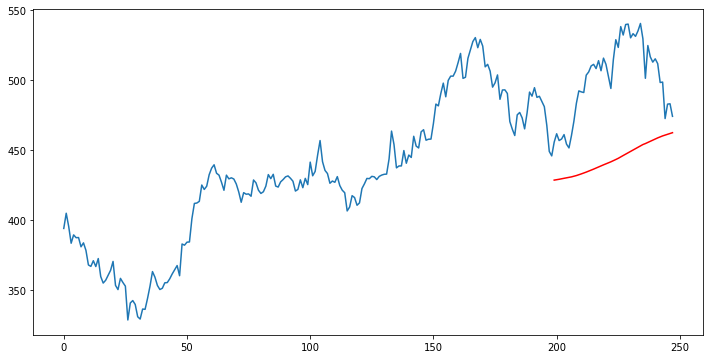

In [13]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma300, 'r')

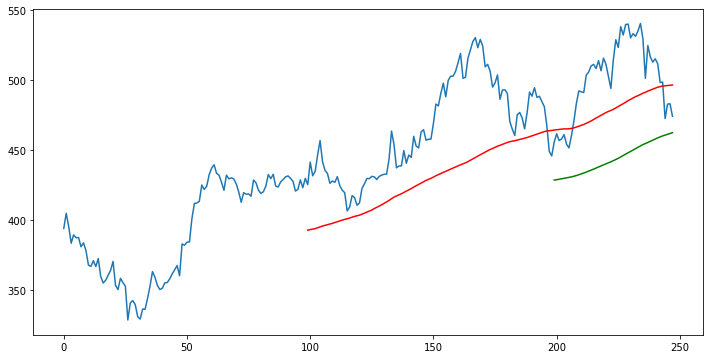

In [14]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma300, 'g')

In [18]:
df.shape

(248, 5)

In [19]:
#spliting the dataset

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.80): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(198, 1)
(50, 1)


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.32415677],
       [0.37797609],
       [0.33134914],
       [0.27182533],
       [0.30133928],
       [0.29141864],
       [0.2919147 ],
       [0.25917658],
       [0.27306541],
       [0.24652768],
       [0.19494041],
       [0.18973214],
       [0.20982136],
       [0.18923608],
       [0.21750994],
       [0.15376984],
       [0.13070439],
       [0.14062503],
       [0.15848205],
       [0.17584316],
       [0.2073412 ],
       [0.12251975],
       [0.1076388 ],
       [0.14732133],
       [0.13268849],
       [0.11979163],
       [0.        ],
       [0.06026783],
       [0.06870042],
       [0.05481145],
       [0.01140867],
       [0.00322418],
       [0.03869042],
       [0.03769844],
       [0.07663681],
       [0.12003959],
       [0.1713789 ],
       [0.15153763],
       [0.12227179],
       [0.1078869 ],
       [0.11235116],
       [0.13169637],
       [0.13244038],
       [0.1458333 ],
       [0.16294645],
       [0.1775793 ],
       [0.19270836],
       [0.156

In [22]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
x_train.shape
y_train.shape

(98,)

In [27]:
#Deep Learning LSTM

#from keras.layers import Dense, Dropout ,LSTM
#from keras.models import Sequential

from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.models import Sequential

In [29]:

# design the model

model = Sequential()
model.add(LSTM(units = 50,activation = 'relu', return_sequences= True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

# model1.add(LSTM(units = 70,activation = 'relu', return_sequences= True))
# model1.add(Dropout(0.3))

model.add(LSTM(units = 70,activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 70)           36680     
                                                                 
 dropout_2 (Dropout)         (None, 100, 70)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [31]:
model.compile(optimizer='', loss='mse')
model.fit(x_train, y_train,epochs = 25)

Epoch 1/25
4/4 [==============================] - 8s 234ms/step - loss: 0.4663
Epoch 2/25
4/4 [==============================] - 1s 239ms/step - loss: 0.3631
Epoch 3/25
4/4 [==============================] - 1s 234ms/step - loss: 0.1255
Epoch 4/25
4/4 [==============================] - 1s 240ms/step - loss: 0.0629
Epoch 5/25
4/4 [==============================] - 1s 232ms/step - loss: 0.0650
Epoch 6/25
4/4 [==============================] - 1s 235ms/step - loss: 0.0537
Epoch 7/25
4/4 [==============================] - 1s 233ms/step - loss: 0.0308
Epoch 8/25
4/4 [==============================] - 1s 228ms/step - loss: 0.0515
Epoch 9/25
4/4 [==============================] - 1s 226ms/step - loss: 0.0291
Epoch 10/25
4/4 [==============================] - 1s 226ms/step - loss: 0.0379
Epoch 11/25
4/4 [==============================] - 1s 225ms/step - loss: 0.0380
Epoch 12/25
4/4 [==============================] - 1s 224ms/step - loss: 0.0283
Epoch 13/25
4/4 [==============================] 

In [47]:
model.save('lstm.h5')

In [32]:
data_testing.head()

,Close
198,446.000000
199,455.850006
200,461.799988
201,456.950012
202,458.049988


In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [35]:
#testing data
final_df.head(5)

,Close
0,429.950012
1,425.500000
2,441.549988
3,431.799988
4,434.899994


In [36]:
#scler the daatset
input_data = scaler.fit_transform(final_df)
input_data

array([[0.17370194],
       [0.14045567],
       [0.26036595],
       [0.1875232 ],
       [0.2106835 ],
       [0.29734774],
       [0.37542031],
       [0.2626074 ],
       [0.21628679],
       [0.19947693],
       [0.14755326],
       [0.15950676],
       [0.15278286],
       [0.18304075],
       [0.13559953],
       [0.11057147],
       [0.09712366],
       [0.        ],
       [0.02091885],
       [0.08143441],
       [0.07134845],
       [0.03025767],
       [0.04295854],
       [0.11953682],
       [0.14456466],
       [0.17332825],
       [0.17220764],
       [0.18453483],
       [0.18191991],
       [0.1673515 ],
       [0.18416136],
       [0.19125873],
       [0.19536794],
       [0.19648855],
       [0.2775495 ],
       [0.42584991],
       [0.35412777],
       [0.22973482],
       [0.23982056],
       [0.24019425],
       [0.32200212],
       [0.2543892 ],
       [0.29809489],
       [0.28539401],
       [0.39820693],
       [0.34590957],
       [0.33582361],
       [0.421

In [37]:
input_data.shape

(150, 1)

In [38]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)


In [40]:
y_predicted = model.predict(x_test)

In [41]:
y_test

array([0.29361222, 0.36720211, 0.41165473, 0.37542031, 0.38363829,
       0.40717228, 0.356369  , 0.3361973 , 0.40156899, 0.47889419,
       0.57377663, 0.64026894, 0.63503934, 0.63167727, 0.72431826,
       0.74150181, 0.77362724, 0.78184544, 0.75943229, 0.80164369,
       0.74785203, 0.81509149, 0.78221891, 0.7172209 , 0.65334328,
       0.80650005, 0.91333599, 0.87224521, 0.98319014, 0.93836383,
       0.99439671, 0.99663794, 0.92342173, 0.94546142, 0.93126624,
       0.96040352, 1.        , 0.9181919 , 0.7075084 , 0.88233095,
       0.82181561, 0.79379917, 0.81135596, 0.78558097, 0.68509524,
       0.68733669, 0.49271568, 0.56966764, 0.5715354 , 0.50466941])

In [42]:
y_predicted

array([[0.65342116],
       [0.6504346 ],
       [0.6472172 ],
       [0.64372325],
       [0.6399416 ],
       [0.63589513],
       [0.6316426 ],
       [0.627228  ],
       [0.62268287],
       [0.6180748 ],
       [0.6135248 ],
       [0.6092105 ],
       [0.60533595],
       [0.60207605],
       [0.5995542 ],
       [0.5978839 ],
       [0.59714806],
       [0.59740186],
       [0.598661  ],
       [0.60088694],
       [0.6040225 ],
       [0.6079587 ],
       [0.61259687],
       [0.61781895],
       [0.62346107],
       [0.6293124 ],
       [0.6352563 ],
       [0.6412771 ],
       [0.64737594],
       [0.65361094],
       [0.66002226],
       [0.6666561 ],
       [0.6735437 ],
       [0.6806539 ],
       [0.68793124],
       [0.69529915],
       [0.70269096],
       [0.71006805],
       [0.71735233],
       [0.72432756],
       [0.730867  ],
       [0.73686206],
       [0.74221975],
       [0.7468876 ],
       [0.7508327 ],
       [0.75398517],
       [0.75628996],
       [0.757

In [45]:
scaler.scale_

array([0.00747105])

In [46]:
scaler_factor = 1/0.00747105
y_predicted = y_predicted * scaler_factor
y_test = y_test * scale_factor

NameError: name 'scale_factor' is not defined

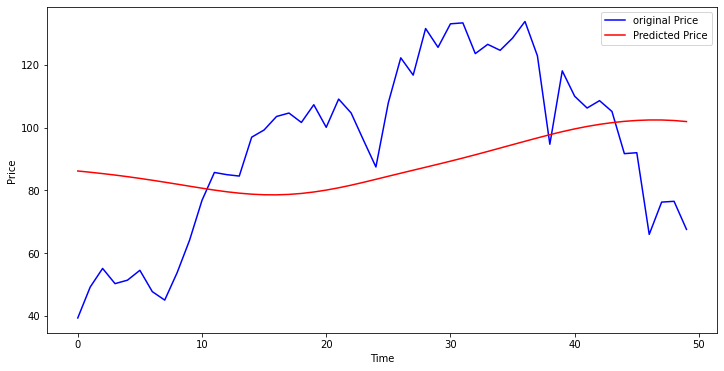

In [70]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b',label = 'original Price')
plt.plot(y_predicted, 'r',label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()